# Regression

# Importing the required libraries

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import time
import plotly.graph_objects as go
import time

# data processing

In [69]:
data = pd.read_csv(r"D:\STOCK MARKET ASSIGNMENT\DATA_ZIP\AApl.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)
features = ['Open', 'High',"Close", 'Low', 'Volume']
target = 'Adj Close'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

***** Linear Regression *****
Training time:  0.0030095577239990234
Testing time:  0.0


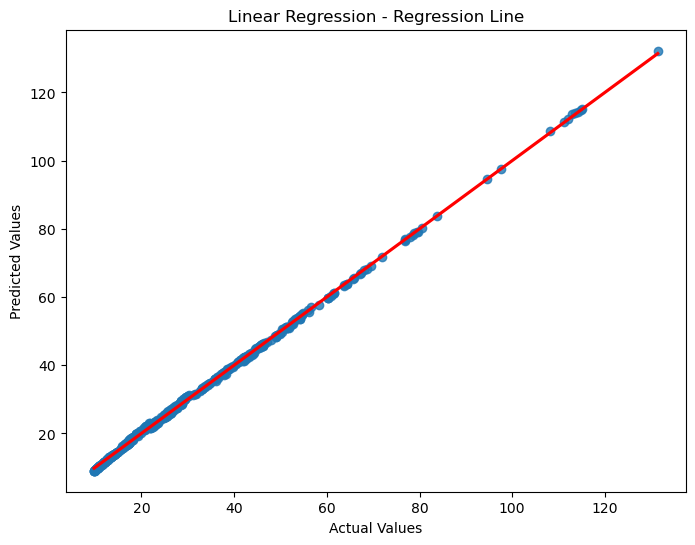

****** Evaluation Metrics ****
Mean Squared Error: 0.22310658974693703
R-squared (R2): 0.9994431825279091
***************************

***** SVR *****
Training time:  0.23198390007019043
Testing time:  0.020281076431274414


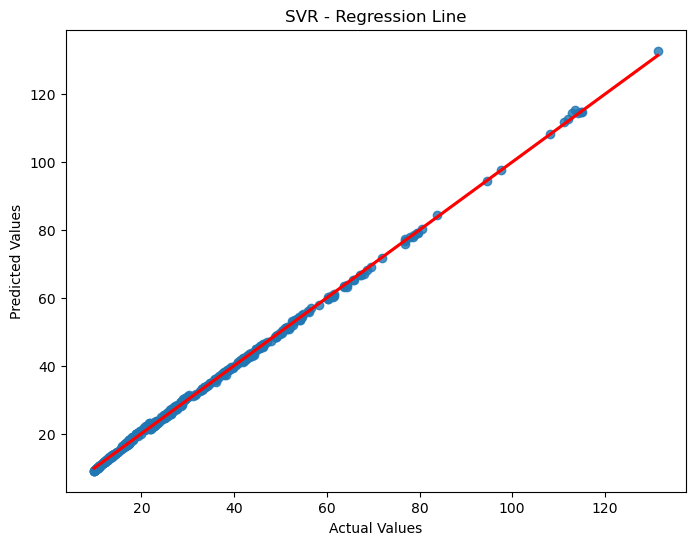

****** Evaluation Metrics ****
Mean Squared Error: 0.26605460840412914
R-squared (R2): 0.9993359951642049
***************************

***** Decision Tree Regression *****
Training time:  0.02293992042541504
Testing time:  0.0


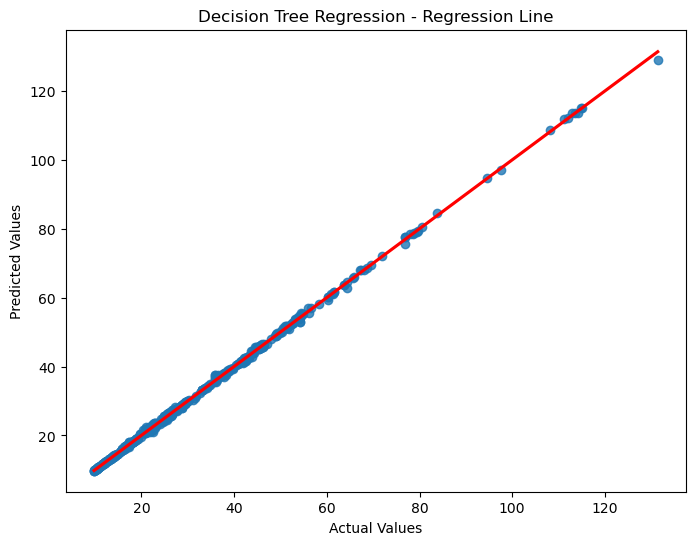

****** Evaluation Metrics ****
Mean Squared Error: 0.17535145432636293
R-squared (R2): 0.9995623672360542
***************************

***** Random Forest Regression *****
Training time:  1.6835684776306152
Testing time:  0.013990163803100586


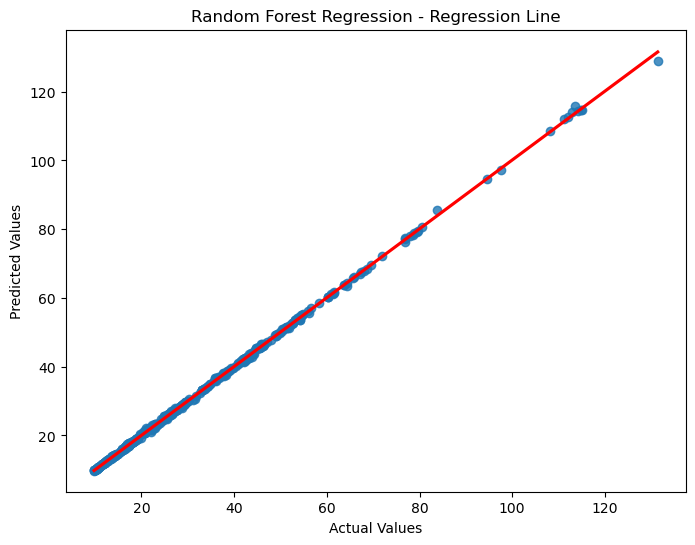

****** Evaluation Metrics ****
Mean Squared Error: 0.11235932410750697
R-squared (R2): 0.9997195796193813
***************************



In [75]:
features = ['Open', 'High', 'Low', 'Volume', 'Close']
target = 'Adj Close'
X = data[features]
y = data[target]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(kernel='linear'),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Scatter plot and regression line for each model
for name, model in models.items():
    print(f"***** {name} *****")
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    print("Training time: ", end_time - start_time)
    
    start_time = time.time()
    y_test_predict = model.predict(X_test_scaled)
    end_time = time.time()
    print("Testing time: ", end_time - start_time)

    # Regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x=y_test, y=y_test_predict, line_kws={"color": "red"})
    plt.title(f'{name} - Regression Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.show()

    # Evaluation metrics
    print("****** Evaluation Metrics ****")
    print('Mean Squared Error:', mean_squared_error(y_test, y_test_predict))
    print('R-squared (R2):', r2_score(y_test, y_test_predict))
    print("***************************\n")


In [77]:
# Load data
data = pd.read_csv(r"D:\STOCK MARKET ASSIGNMENT\DATA_ZIP\AAPL.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)
# Features and target
features = ['Open', 'High', 'Low', 'Volume',"Close"]
target = 'Adj Close'
X = data[features]
y = data[target]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(kernel='linear'),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}
# Lists to store training and testing times
training_times = []
testing_times = []
# Training and testing times for each model
for name, model in models.items():
    print(f"***** {name} *****")
    # Training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)
    print("Training time: ", training_time)
    # Testing time
    start_time = time.time()
    y_test_predict = model.predict(X_test_scaled)
    end_time = time.time()
    testing_time = end_time - start_time
    testing_times.append(testing_time)
    print("Testing time: ", testing_time)
    # Evaluation metrics
    print("****** Evaluation Metrics ****")
    print('Mean Squared Error:', mean_squared_error(y_test, y_test_predict))
    print('R-squared (R2):', r2_score(y_test, y_test_predict))
    print("***************************\n")
# Plotly bar chart for training and testing times
fig = go.Figure()
fig.add_trace(go.Bar(x=list(models.keys()), y=training_times, name='Training Time', marker_color='blue'))
fig.add_trace(go.Bar(x=list(models.keys()), y=testing_times, name='Testing Time', marker_color='orange'))

fig.update_layout(
    title='Training and Testing Times for Each Model',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Time (seconds)'),
    barmode='group'
)
fig.show()

***** Linear Regression *****
Training time:  0.0015120506286621094
Testing time:  0.0
****** Evaluation Metrics ****
Mean Squared Error: 0.22310658974693703
R-squared (R2): 0.9994431825279091
***************************

***** SVR *****
Training time:  0.24917888641357422
Testing time:  0.020053863525390625
****** Evaluation Metrics ****
Mean Squared Error: 0.26605460840412914
R-squared (R2): 0.9993359951642049
***************************

***** Decision Tree Regression *****
Training time:  0.021353721618652344
Testing time:  0.0
****** Evaluation Metrics ****
Mean Squared Error: 0.17535145432636293
R-squared (R2): 0.9995623672360542
***************************

***** Random Forest Regression *****
Training time:  1.6729631423950195
Testing time:  0.014003276824951172
****** Evaluation Metrics ****
Mean Squared Error: 0.11235932410750697
R-squared (R2): 0.9997195796193813
***************************

